In [18]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from part2_lu import *

## Mathematical and Numerical Physics
### Numerical part 2
#### Kevin Vonk, s1706896, _Dec 2020 - Jan 2021_

## General Part
### Question 1
#### a.
Firstly, let us write out the component-wise product $\boldsymbol{T} = \boldsymbol{L'}\boldsymbol{U'}$, where $i = 2, ..., N$,
\begin{align*}
    t_{1,1} &= l'_{1,1} \\
    t_{i, i-1} &= l'_{i, i-1} \\
    t_{i, i} &= l'_{i, i-1} \cdot u'_{i-1, i} + l'_{i, i} \\
    t_{i-1, i} &= l'_{i-1, i-1} \cdot u'_{i-1, i}.
\end{align*}

Now that we have these expressions, we can define the form of $\boldsymbol{L'}$ and $\boldsymbol{U'}$ analogously to eq. (1.7) of the lecture notes,
\begin{equation*}
    l'_{1, 1} = t_{1, 1}; \; \text{for} \; i = 2, ..., N, \; u'_{i-1, i} = \frac{t_{i-1, 1}}{l'_{i-1, i-1}}; \; l'_{i, i-1} = t_{i, i-1}; \; l'_{i, i} = t_{i, i} - l'_{i, i-1} \cdot u'_{i-1, i}.
\end{equation*}

We still perform the forward subsitution as $\boldsymbol{L'}\boldsymbol{y} = \boldsymbol{b}$ as in eq. (1.8) in the lecture notes,
\begin{equation*}
    y_1 = \frac{b_1}{l'_{1, 1}}; \; \text{for} \; i = 2, ..., N \; y_i = \frac{b_i}{l'_{i, i}} - l'_{i, i-1}y_{i-1}.
\end{equation*}

Finally, for the back subsitution step $\boldsymbol{U}\boldsymbol{x} = \boldsymbol{y}$ we again follow the same procedure as in eq. (1.9) of the lecture notes,
\begin{equation*}
    x_N = y_N; \; \text{for} \; i = N, ..., 2 \; x_{i-1} = y_{i-1} - u'_{i-1, i}x_i.
\end{equation*}

#### b.
_Case I_

We can naively solve this system by writing out the two linear equations,
\begin{align*}
    x_1 + x_2 &= 1 \\
    x_1 + (1 + 10^{-10})x_2 &= 1.
\end{align*}

Filling in one into the other yields,
\begin{align*}
    1 - x_2 + (1 + 10^{-10})x_2 &= 1 \\
    10^{-10}x_2 &= 0 \\
    x_2 &= 0 \\
    &\rightarrow x_1 = 1.
\end{align*}

So,
\begin{equation*}
    \vec{x} = \begin{pmatrix}1 \\ 0\end{pmatrix}.
\end{equation*}

_Case II_

Similarly as above,
\begin{align*}
    x_1 + x_2 &= 1 \\
    x_1 + (1 + 10^{-10})x_2 &= 1 + 10^{-10}.
\end{align*}

Again, filling in one into the other,
\begin{align*}
    1 - x_2 + (1 + 10^{-10})x_2 &= 1 \\
    10^{-10}x_2 &= 10^{-10} \\
    x_2 &= 1 \\
    &\rightarrow x_1 = 0.
\end{align*}

So,
\begin{equation*}
    \vec{x} = \begin{pmatrix}0 \\ 1\end{pmatrix}.
\end{equation*}

#### c.
Before even having calculated anything I am certain this matrix is ill-conditioned, purely due to the $10^{-10}$ term present. Let us prove this however by computing the eigenvalues of this matrix,
\begin{align*}
    \begin{vmatrix}
        1 - \lambda & 1 \\
        1 & 1 + 10^{-10} - \lambda
    \end{vmatrix} &= 0 \\
    (1 - \lambda)(1 + 10^{-10} - \lambda) - 1 &= 0 \\
    \lambda^2 -\lambda(2 + 10^{-10}) + 10^{-10} &= 0 \\
    \lambda_\pm = \frac{2 + 10^{-10} \pm \sqrt{(2 + 10^{-10})^2 - 4*10^{-10}}}{2} &\\
    \lambda_\pm = \frac{2 + 10^{-10} \pm \sqrt{4 + 10^{-20}}}{2}. &\\
\end{align*}

Now, these two eigenvalues turn out to be vastly different from one another, about an expected order of magnitude $10^{-10}$. Now, it doesn't yield anything by writing out these expressions further, nor is it easy and useful to simplify this further. We can however, give the approximate values:
\begin{align*}
    \lambda_{\text{max}} \approx 2; \; \lambda_{\text{min}} \approx 5\cdot 10^{-11}.
\end{align*}

Filling in these values into the expression for the condition number yields,
\begin{align*}
    \kappa \approx \frac{2}{5\cdot 10^{-11}} \approx 4\cdot 10^{10}.
\end{align*}

Given that $\kappa$ should idealy lie around $1$, to say that this matrix is ill-conditioned is an understatement. 

#### d.
What we have here is a nearly singular matrix ($\begin{bmatrix}1 & 1 \\ 1 & 1\end{bmatrix}$ is a fully singular matrix, and we are only $10^{-10}$ away from this in only a single element). We have already established that this problem is ill-conditioned, and indeed, when changing the independent variables only slightly (case I to case II), the dependent variable $\vec{x}$ changes dramatically. From the definition of the condition number (eq. (1.13) of the lecture notes), we learn that it is related to the maximum relative error. Given that the condition number is in the order of $10^{10}$ for this problem, and assuming that for the uncertainty $\delta$ of $b$ it holds that $\delta < b$ (which is a more than reasonable assumption), the error is so incredibly large that the solution for $\vec{x}$ is useless.

Now, if $\vec{b}$ were some inputs to a model and $\vec{x}$ the output parameters, we can deduce from what has previously been stated that a tiny change in the input (possibly even rounding errors) will lead to a completely different output of the model. This leads us to conclude that convergence is (nearly) impossible (i.e. we will not find a solution to $\vec{x}$ to a reasonable degree, if at all), or that the problem is ill-conditioned (i.e. the parameters that we need to work with cannot produce a satisfying result).

### Question 2
#### a.
The implementation that I have written stores the tridiagonal LU decomposition in $3N - 1$ units of memory. This is a little worse than the theoretical $3N - 2$ if we assume that only array elements take memory. The reason for this is that instead of having three arrays, one for the off-diagonal $L$, one for the diagonal $U$ and one for the off-diagonal $U$, I have a 1-D array of length $N - 1$ for $L$, and a 2-D array of length $2 \times N$ for $U$. Since the off-diagonal of $U$ only has $N - 1$ elements, the last element of this 2-D array is always zero, and thus wasted. However, in an actual memory map this method will be more efficient than the three separate arrays, since there is less header data and/or metadata needed to define the arrays.

Now, let us consider the given matrix $T$. From the tridiagonal decomposition (eqs. (1.7) - (1.9) in the lecture notes) we can state the following,
\begin{align*}
    u_{i-1, i} &= t_{i-1, i} = 1 \\
    u_{i, i} &= t_{i, i} - l_{i, i-1}u_{i-1,i} \\
    &= -2 - u_{i-1, i-1}^{-1} &\quad \text{(filling in the general expression for $l_{i, i-1}$)}\\
    l_{i, i-1} &= t_{i, i-1} \cdot u_{i-1, i-1}^{-1} \\
    &= -(2 + u_{i-2, i-2}^{-1})^{-1} &\quad \text{(using the found relation for the diagonal of $U$)}\\
    &= -(2 + l_{i-1, i-2})^{-1} &\quad \text{(using the general expression stated above, $l_{i, i-1} = ...$)}
\end{align*}

Lastly, let us check if these relations are identical to the result we obtain from our written tridiagonal LU decomposition. The Python code used to verify this is found below.

In [19]:
N = 10
diag = -2 * np.ones(N)
off_diag = np.ones(N-1)

# Decompose the matrix
l, u = SparseTridiagonal().decompose(diag, off_diag)

# Compare to the recurrence relations
res_l = l == -1 / (2 + np.roll(l, 1))
res_u = u[0, :] == -2 - 1/np.roll(u[0], 1)

# Check if the recurrence relations hold for i = range(1, N)
if res_l[1:].all() and res_u[1:].all():
    print("The recurrence relations hold.")
else:
    print("The recurrence relations do not agree with the tridiagonal decomposition.")

The recurrence relations hold.


As we can see from the script's result, the recurrence relations hold for $i \in {2, ..., N}$ (in 1-based indexing). The reason that we skip the first index is because for $i = 1$, $l_{i, i-1}$ is not defined (or out of bounds).

#### b.
The analytical solution to the problem of eq. (3) in the assignment is $f(y) = -\frac{1}{\pi^2} \sin(\pi y)$. This solution, along with the numerical solution is plotted in the figure below. Additionally, the difference between the two is also plotted.

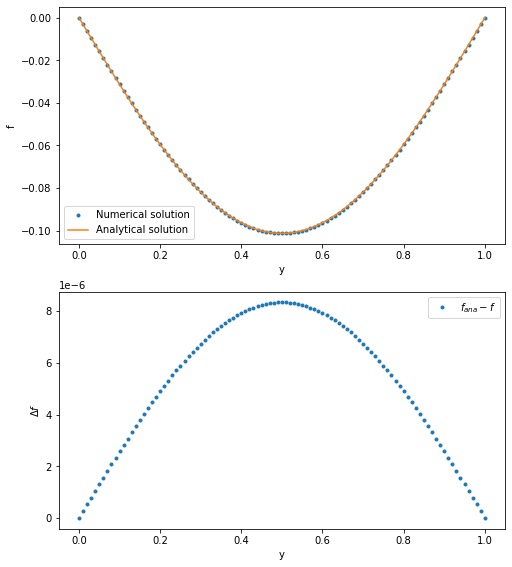

In [63]:
def solve_and_plot_2(y, dy, g, f_ana):
    matrix = SparseTridiagonal()
    matrix.decompose(diag, off_diag)
    f = matrix.solve(dy**2 * g[1:-1])
    f = [0, *f, 0]

    plt.figure(figsize=(8, 2*4.8))
    plt.subplot(211)
    plt.plot(y, f, '.', label="Numerical solution")
    plt.plot(y, f_ana, label="Analytical solution")
    plt.legend()
    plt.xlabel("y")
    plt.ylabel("f")
    plt.subplot(212)
    plt.plot(y, f_ana - f, '.', label=r"$f_{ana} - f$")
    plt.legend()
    plt.xlabel("y")
    plt.ylabel(r"$\Delta f$")

    return f

N = 101
diag = -2 * np.ones(N-2)
off_diag = np.ones(N-3)

y, dy = np.linspace(0, 1, N, retstep=True)
g = np.sin(np.pi * y)
f_ana = -np.sin(np.pi * y) / np.pi**2

solve_and_plot_2(y, dy, g, f_ana);

We can see that the numerical computation agrees rather well with the analytical solution. The largest difference between the two is found at $y = 0.5$ where $\Delta f \approx 8.3 \cdot 10^{-6}$.

#### c.
Now, we do the same as we have done at b., but now we apply some small perturbations. The analytical solution will not take into account the small perturbations we are introducing into the system.

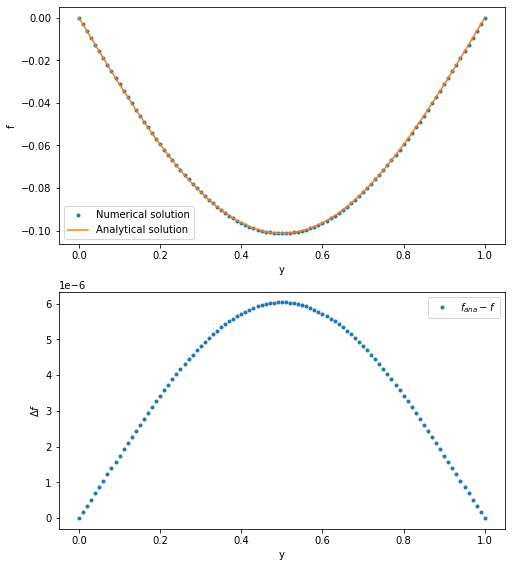

In [64]:
rng = np.random.default_rng()

g = g + (rng.random() - 0.5)*1E-4

f = solve_and_plot_2(y, dy, g, f_ana)

What we can deduce from these results is that the small perturbations have a negligible effect on the found solution. The order in the difference is still at $10^{-6}$, and this maximum is still found at $y = 0.5$. Compared to what we have observed in question 1, we can say that the problem is well-conditioned. In order to give some weight to this conclusion, let us compute the condition number for this problem using the maximum relative error definition. We will assume an Euclidean norm.

In [75]:
err = f_ana - f
delta = 0.5 * 1E-4

cn = np.max((np.linalg.norm(err) / np.linalg.norm(f)) / (delta / np.linalg.norm(g)))
print(f"The condition number is {cn:.2f}")
print(f"Significant digits lost (rounded up): {np.ceil(np.log(cn)):.0f}")

The condition number is 11.63
Significant digits lost (rounded up): 3


This condition number seems reasonable, as it is larger than $1$, but not so large such that it would imply an ill-defined problem. Additionally, the amount of significant digits that have been lost is not terrible, but if our initial condition is poorly defined then our results become inaccurate.